In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import napari
import colorcet as cc
import pandas as pd

import dnt

spots_directory = Path(r"D:\Tracking\DrosophilaNucleusTracking\data\spots")
save_path = Path(r"D:\Tracking\DrosophilaNucleusTracking\figures\output\wave_speeds")
save_path.mkdir(exist_ok=True)

include = [1, 3, 4, 6, 7, 8]
earliest_frames = [25, 48, 43, 63, 80, 30]

dnt.set_plot_style()
spots_dfs, metadatas, stems = dnt.load_spots_data(spots_directory, include)

df = spots_dfs[0]
cycles = [10, 11, 12, 13, 14]

print(df.columns)

['lightsheet_20241104_spots', 'lightsheet_20250131_spots', 'lightsheet_20250206_spots', 'lightsheet_20250414_spots', 'lightsheet_20250625_spots', 'lightsheet_20250627_spots', 'lightsheet_20250702_spots', 'lightsheet_20250704_spots', 'lightsheet_20250705_spots', 'lightsheet_trk_20250318_spots', 'lightsheet_trk_20250319a_spots', 'lightsheet_trk_20250319b_spots', 'lightsheet_trk_20250321_spots', 'lightsheet_trk_20250325_spots']


reading spots dfs: 0it [00:00, ?it/s]

[  0  35  60 110 160 280] 25 246


reading spots dfs: 2it [00:01,  1.65it/s]

[  0  50  80 140 200 280] 0 283


reading spots dfs: 4it [00:02,  1.53it/s]

[  0  55  90 140 200 350] 0 332


reading spots dfs: 5it [00:04,  1.14s/it]

[  0  65 100 150 225 350] 0 311


reading spots dfs: 7it [00:06,  1.01it/s]

[  0  85 125 170 225 350] 0 325


reading spots dfs: 8it [00:08,  1.17s/it]

[  0  42  65 130 200 350] 0 320


reading spots dfs: 14it [00:10,  1.28it/s]

Index(['time_since_nc11', 'z', 'y', 'x', 'AP', 'theta', 'area', 'radius',
       'intensity_mean', 'cycle', 'display_z', 'display_y', 'display_x',
       'px_z', 'px_y', 'px_x', 'px_area', 'uv_v', 'uv_u', 'uv_z',
       'uv_distance_from_edge', 'distance_from_surface', 'uv_area',
       'area_distortion', 'mesh_name', 'interpolated', 'track_id',
       'tracklet_id', 'parent_id', 'n_children', 'n_parents', 'AP_raw',
       'AP_um', 'AP_um_centered', 'um_from_anterior', 'um_from_posterior',
       'distance_to_pole', 'time', 'trk', 'problematic', 'frame',
       'trackmate_id', 'status', 'source', 'is_parent', 'is_child',
       'pseudotime', 'distance', 'cycle_pseudotime', 'dx', 'dy', 'dz', 'dAP',
       'dtheta', 'dtot', 'dAP_abs'],
      dtype='object')


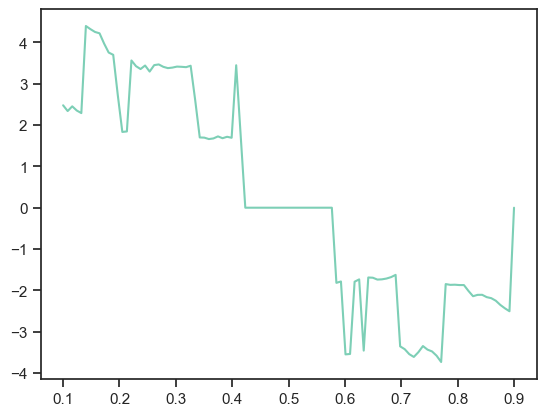

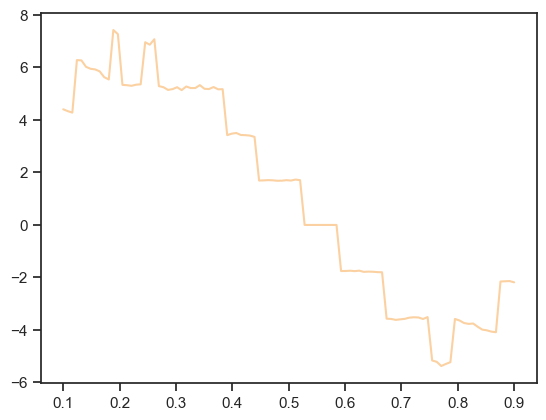

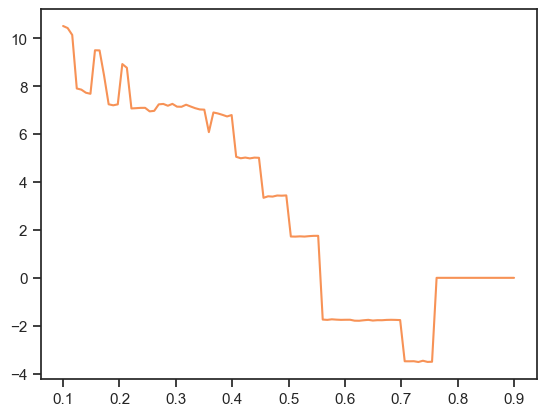

In [16]:
k = 1
df = spots_dfs[k]

for cycle in [11, 12, 13]:
    cycle_df = df[df["cycle"] == cycle].copy()
    cycle_df = cycle_df[cycle_df["distance"] < 3]

    t = cycle_df.groupby("tracklet_id")
    APs = t["AP"].first().values
    division_times = t["time_since_nc11"].max().values

    ap_linspace = np.linspace(0.1, 0.9, 100)
    left_bounds = ap_linspace - 0.2
    right_bounds = ap_linspace + 0.2

    speeds = []
    for i in range(len(ap_linspace)):
        left_mask = (APs >= left_bounds[i]) & (APs < ap_linspace[i])
        right_mask = (APs > ap_linspace[i]) & (APs <= right_bounds[i])

        left_time = np.median(division_times[left_mask])
        right_time = np.median(division_times[right_mask])

        left_ap = np.median(APs[left_mask])
        right_ap = np.median(APs[right_mask])

        speed_inv = (right_time - left_time) / (right_ap - left_ap)
        speeds.append(speed_inv)

    speeds = np.array(speeds)
    plt.plot(ap_linspace, speeds, label=f"Cycle {cycle}", color=dnt.palettes.nc[cycle + 1])

    plt.show()